## Python version (sklearn)

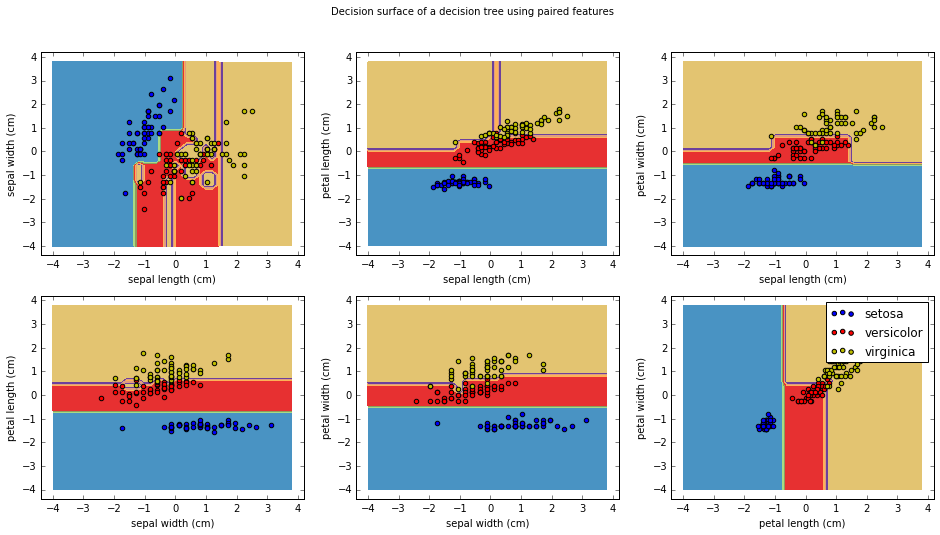

In [84]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.2

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    
    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    xx, yy = np.meshgrid(np.arange(-4, 4, plot_step),
                         np.arange(-4, 4, plot_step))

    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()

# plt.show()

## Crystal version (crystal-learn)

```ruby
require "csv"
require "../ml"
require "../trees"

pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

iris_data, iris_target = ML.load_floats_csv("../iris.csv")

pairs.each_with_index do |pair, pairidx|
  # We only take the two corresponding features
  x = iris_data.keep_columns(pair)
  y = iris_target

  # Standardize
  x = ML.standardize(x)

  # Train
  clf = ML::Classifiers::DecisionTreeClassifier.new.fit(x, y)

  f = File.open("csv_for_pair_#{pairidx}.csv", mode: "w")

  result = CSV.build(f) do |csv|
    ML.arange(-4.0, 4, step: 0.2) do |f2|
      ML.arange(-4.0, 4, step: 0.2) do |f1|
        z = clf.predict([f1, f2])
        csv.row f1, f2, z, "False"
      end
    end
    x.each_with_index do |row, idx|
      csv.row row[0], row[1], y[idx], "True"
    end
  end

  f.close()
end

```

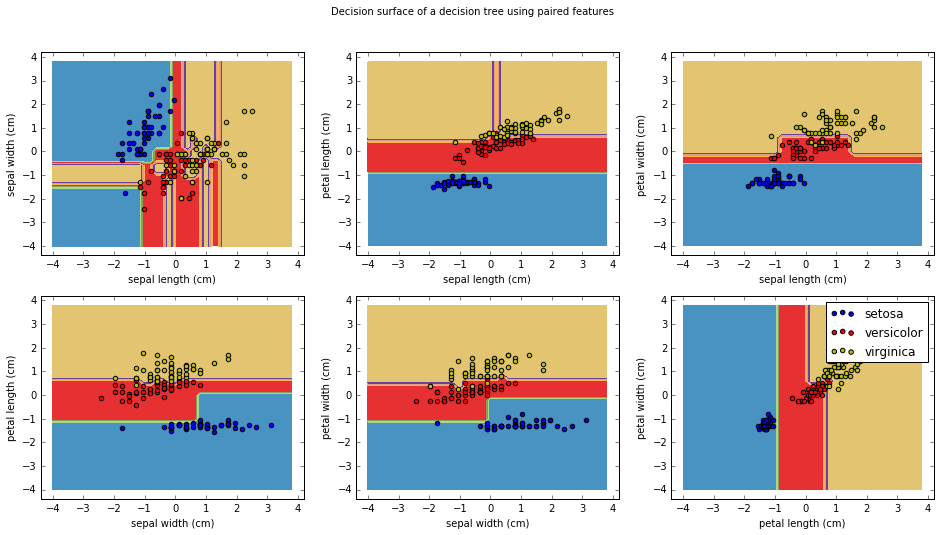

In [86]:
categories = ["setosa", "versicolor", "virginica"]
def category_number(x):
    return categories.index(x)

import pandas as pd
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = pd.read_csv('csv_for_pair_{}.csv'.format(pairidx), names = ["x", "y", "category", "real"])
    
    plt.subplot(2, 3, pairidx + 1)
        

    
    Xf = X[X.real == False]
    Z = np.array([category_number(x) for x in list(Xf["category"])])
    cs = plt.contourf(Xf.x.reshape(xx.shape), Xf.y.reshape(xx.shape), Z.reshape(xx.shape), cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    Xr = X[X.real == True ]
    for category, color in zip(categories, plot_colors):
        idx = np.where(Xr.category == category)
        a = np.array(Xr.x)[idx]
        b = np.array(Xr.y)[idx]
        plt.scatter(a, b, c=color, label=category, cmap=plt.cm.Paired)
    
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

